# Introduction

Today's dataset comes from the UCI Machine Learning Repository and is a set of data on [Online News Popularity](http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity) for articles shared on Mashable.

The dataset can be found in this repository (`datasets/OnlineNewsPopularity.csv`) and the codebook can be found within the `datasets` folder as well (or online [here](https://git.generalassemb.ly/DSI-EAST-1/lab-feature-selection-grid-search/blob/master/datasets/OnlineNewsPopularity.names).) However, you will not need to have intimate domain knowledge to create a great model!

## Question 1: EDA

For this step, do the following:
- Import the data in `datasets/OnlineNewsPopularity.csv`
- Use methods like `.describe()` and `.info()` to identify if there is any missing data and any non-numeric data
- Print out the results of `df.columns` -- are these names formatted correctly?
- Drop any columns that do not contain numeric values
- Drop or impute any missing data
- Recode the `shares` column (your target) to be 1 if shares is >= 1500 and 0 otherwise

In [155]:
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression

In [156]:
online_news = pd.read_csv('datasets/OnlineNewsPopularity.csv')
online_news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [157]:
online_news.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [158]:
online_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [159]:
online_news.isnull().sum()

url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                 

In [160]:
'''Transforming the Shares Column'''
def act_on_shares(x): 
    if x > 1500: 
        return 1
    else: 
        return 0 

In [161]:
'''Applying the function on the column using the apply method'''
online_news[' shares'] = online_news[' shares'].apply(act_on_shares)

In [162]:
online_news[' shares'][0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    0
Name:  shares, dtype: int64

In [163]:
online_news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,0
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


In [164]:
online_news.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

## Question 2: Correlation Table

Use Seaborn and pandas to create a correlation heatmap. What patterns are apparent to you? Is this easy to use or too cluttered to make sense of?

In [165]:
online_news_new = online_news.iloc[:,1:-1]
online_news_new.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [166]:
online_new_corr = online_news_new.corr()
online_new_corr

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.126344,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.049619,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,0.135123,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,-0.000487,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.002285,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,...,0.004671,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,0.188236,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,0.098062,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,0.096446,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307
num_videos,0.000936,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,...,0.097440,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231


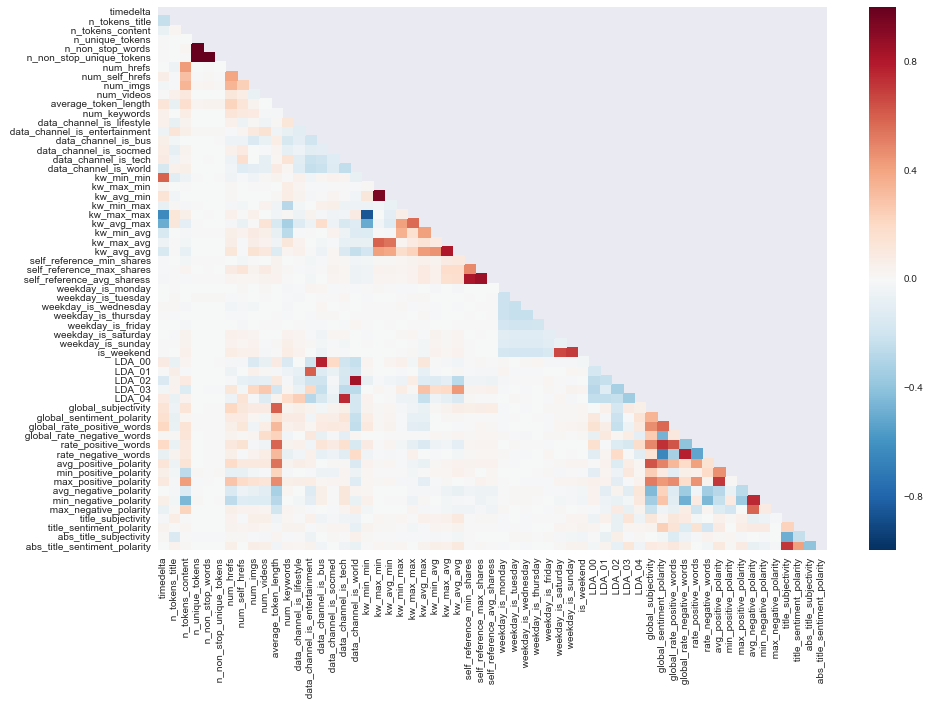

In [167]:
fig, ax = plt.subplots(figsize = (15,10))

mask = np.zeros_like(online_new_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(online_new_corr, mask=mask)



We see some level of correlation between the predictor variables however, the plot looks very cluttered

## 3. Train-test split

Split your data frame into your target (the `shares` column) and your features (all other columns), then split those into a training and holdout (test) set. You will not use this holdout set until the end of the lab. 

Your test size should be `0.33` and should use the random seed `20170825`.

In [364]:
X = online_news_new
print (type(X))
X.head()

<class 'pandas.core.frame.DataFrame'>


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [365]:
y = online_news[' shares']
print (type(y))
y.head()

<class 'pandas.core.series.Series'>


0    0
1    0
2    0
3    0
4    0
Name:  shares, dtype: int64

In [353]:
'''Setting up the X train and Y train and the validating the shape of the training and test datasets'''
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=20170825)

print ('X Train: ', X_train.shape)
print ('Y Train: ', y_train.shape)
print ('X Test: ', X_test.shape)
print ('Y Test: ', y_test.shape)
print (type(X_train))


X Train:  (26561, 59)
Y Train:  (26561,)
X Test:  (13083, 59)
Y Test:  (13083,)
<class 'pandas.core.frame.DataFrame'>


## 4. Feature Selection through Regularization

Use a Lasso Logistic Regression to decide on a set of features to select. 

1. Standardize your training dataset.
2. Fit three lasso logistic regressions with `C` of 0.1, 1.0, and 10.0. Double check with the documentation to ensure that you are fitting **Lasso** logistic regressions.
3. Identify which columns have zero coefficients. 
4. What trends do you see? Are there any features that seem like strong contenders to be put in the model? 
    > If there are no trends yet, no worries! We're going to try other feature selection techniques as well.

In [385]:
#1 
ss=StandardScaler()
X_train_transform = ss.fit_transform(X_train)
print (type(X_train_transform))

<class 'numpy.ndarray'>


In [356]:
lasslogreg = LogisticRegression(penalty='l1', C=0.1)
lassologreg_fit = lasslogreg.fit(X_train_transform, y_train)
lassologreg_fit

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [357]:
lassologreg_coeff_01 = lassologreg_fit.coef_

print (lassologreg_coeff_01.shape)
print ('\n')
print (lassologreg_coeff_01)
print ('\n')
print (lassologreg_coeff_01[0][0])

(1, 59)


[[ 0.01555876  0.02122433  0.08783887 -0.01022878  0.00955845 -0.06607363
   0.07009849 -0.0694837   0.02145194  0.01061701 -0.06990304  0.06562839
  -0.03605739 -0.14730784 -0.1104809   0.16118207  0.1638378  -0.00316504
   0.09154271  0.0977613  -0.11582403 -0.01610659 -0.07953979 -0.09191938
  -0.0926274  -0.55671068  0.93845164  0.06608086  0.04657598  0.02374786
   0.00942391 -0.03556293 -0.02603846  0.          0.03232635  0.05337566
   0.          0.23614879  0.27764172 -0.0039491  -0.07702313  0.
   0.12687879  0.07934313 -0.01266291 -0.03170391  0.          0.05922559
   0.         -0.00740096 -0.02345767 -0.00142352 -0.01914274  0.
   0.02684433  0.04602288  0.05790512  0.05929478  0.        ]]


0.0155587560188


In [244]:
X_cols = list(X.columns)

for col, coef in zip(X_cols, lassologreg_coeff_01[0]):
        if coef == 0.0:
            print('Dropped: ', col, coef) 

Dropped:   weekday_is_thursday 0.0
Dropped:   weekday_is_sunday 0.0
Dropped:   LDA_03 0.0
Dropped:   global_rate_negative_words 0.0
Dropped:   rate_negative_words 0.0
Dropped:   min_negative_polarity 0.0
Dropped:   abs_title_sentiment_polarity 0.0


In [245]:
# All in one place 

In [251]:
# With C = 0.01 
lasslogreg = LogisticRegression(penalty='l1', C=0.1)
lassologreg_fit = lasslogreg.fit(X_train_transform, y_train)

lassologreg_coeff_01 = lassologreg_fit.coef_

X_cols = list(X.columns)
zero_coeff_01 = []
for col, coef in zip(X_cols, lassologreg_coeff_01[0]):
        if coef == 0.0:
            zero_coeff_01.append(col)
#             print('Dropped: ', col, coef) 

print ('Dropped Coefficients with C = 0.01\n')
pprint.pprint  (zero_coeff_01)

Dropped Coefficients with C = 0.01

[' weekday_is_thursday',
 ' weekday_is_sunday',
 ' LDA_03',
 ' global_rate_negative_words',
 ' rate_negative_words',
 ' min_negative_polarity',
 ' abs_title_sentiment_polarity']


In [253]:
# With C = 1
lasslogreg = LogisticRegression(penalty='l1', C=1.0)
lassologreg_fit = lasslogreg.fit(X_train_transform, y_train)

lassologreg_coeff_01 = lassologreg_fit.coef_

X_cols = list(X.columns)
zero_coeff_1 = []
for col, coef in zip(X_cols, lassologreg_coeff_01[0]):
        if coef == 0.0:
            zero_coeff_1.append(col)
#             print('Dropped: ', col, coef) 

print ('Dropped Coefficients with C = 1\n')
pprint.pprint  (zero_coeff_1)

Dropped Coefficients with C = 1

[' n_non_stop_words', ' weekday_is_thursday', ' weekday_is_sunday', ' LDA_03']


In [254]:
# With C = 10
lasslogreg = LogisticRegression(penalty='l1', C=10.0)
lassologreg_fit = lasslogreg.fit(X_train_transform, y_train)

lassologreg_coeff_01 = lassologreg_fit.coef_

X_cols = list(X.columns)
zero_coeff_10 = []
for col, coef in zip(X_cols, lassologreg_coeff_01[0]):
        if coef == 0.0:
            zero_coeff_10.append(col)
#             print('Dropped: ', col, coef) 

print ('Dropped Coefficients with C = 10\n')
pprint.pprint  (zero_coeff_10)

Dropped Coefficients with C = 10

[' weekday_is_monday']


## 5. Feature Selection with RFE

Use Recursive Feature Elimination and a new Logistic Regression object to do feature selection.

1. Instantiate an `RFE` object, set to cut down your input features to 50% of the input, as well as a `LogisticRegression` object.
2. Fit your `RFE` object to your standardized features in your training set. 
3. What features does RFE suggest to drop? Are there any similarities to those features dropped by regularization?
    > Remember that after fitting, `RFE.support_` gives you a mask of columns, where columns marked `True` are going to be kept and columns marked `False` should be dropped.

In [174]:
#1 and 2. 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=30, verbose=2)
rfe.fit(X_train_transform, y_train)

Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 fe

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=30, step=1, verbose=2)

In [175]:
rfe.support_

array([False, False,  True, False,  True,  True,  True,  True, False,
       False,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False], dtype=bool)

In [176]:
type(rfe.support_)

numpy.ndarray

In [177]:
#3. 
import pprint
X_cols = list(X.columns)
retained_rfe_coefficients  = {} 
non_retained_rfe_coefficients  = {} 
col_key = 0 

for rfe_key, rfe_value in enumerate(rfe.support_): 
    col_key = rfe_key
    if rfe_value == True:
        retained_rfe_coefficients[X_cols[col_key]] = rfe_value
    else: 
        non_retained_rfe_coefficients[X_cols[col_key]] = rfe_value
        
print ('Length of Retained Coeff:' , len(retained_rfe_coefficients))
print ('\n')
pprint.pprint (retained_rfe_coefficients)
print ('\n')
print ('Length of Non Retained Coeff:' , len(retained_rfe_coefficients))
print ('\n')
pprint.pprint (non_retained_rfe_coefficients)
    

Length of Retained Coeff: 30


{' LDA_00': True,
 ' LDA_01': True,
 ' LDA_02': True,
 ' LDA_03': True,
 ' average_token_length': True,
 ' data_channel_is_bus': True,
 ' data_channel_is_entertainment': True,
 ' data_channel_is_socmed': True,
 ' data_channel_is_tech': True,
 ' global_subjectivity': True,
 ' is_weekend': True,
 ' kw_avg_avg': True,
 ' kw_avg_max': True,
 ' kw_avg_min': True,
 ' kw_max_avg': True,
 ' kw_max_max': True,
 ' kw_max_min': True,
 ' kw_min_avg': True,
 ' kw_min_min': True,
 ' n_non_stop_unique_tokens': True,
 ' n_non_stop_words': True,
 ' n_tokens_content': True,
 ' num_hrefs': True,
 ' num_self_hrefs': True,
 ' rate_negative_words': True,
 ' rate_positive_words': True,
 ' self_reference_max_shares': True,
 ' self_reference_min_shares': True,
 ' weekday_is_saturday': True,
 ' weekday_is_sunday': True}


Length of Non Retained Coeff: 30


{' LDA_04': False,
 ' abs_title_sentiment_polarity': False,
 ' abs_title_subjectivity': False,
 ' avg_negative_polarity': Fals

## 6. Feature Selection with SelectKBest

Use SelectKBest and `f_classif` to select the top 30 features

1. Instantiate a SelectKBest, using a `score_func` of `f_classif` and a `k` of 30
    > Note, `f_classif` needs to be imported as well! 
2. Fit SelectKBest to your standardized features in the training set.
3. Print out which columns are dropped in this case.
4. Pick a set of columns (such as `LDA`, `polarity`, `weekday`, or `data_channel` -- are any columns that have been consistently dropped? 
    > Remember that after fitting, `SelectKBest.get_support()` gives you a mask of columns, where columns marked `True` are going to be kept and columns marked `False` should be dropped.

In [178]:
#1, 2
selectkbest = SelectKBest(score_func=f_classif, k = 30)
selectkbest_fit = selectkbest.fit(X_train_transform, y_train)
selectkbest_fit

SelectKBest(k=30, score_func=<function f_classif at 0x10e4b1ae8>)

In [179]:
selectkbest_fit_support = selectkbest_fit.get_support()
selectkbest_fit_support

array([False, False,  True,  True, False,  True,  True, False,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False,  True], dtype=bool)

In [180]:
#3 

import pprint
X_cols = list(X.columns)
retained_skb_coefficients  = {} 
non_retained_skb_coefficients  = {} 

col_key = 0 

for skb_key, skb_value in enumerate(selectkbest_fit_support): 
    col_key = skb_key
    if skb_value == True:
        retained_skb_coefficients[X_cols[col_key]] = rfe_value
    else: 
        non_retained_skb_coefficients[X_cols[col_key]] = rfe_value
        
print ('Length of Retained Coeff:' , len(retained_skb_coefficients))
print ('\n')
pprint.pprint (retained_skb_coefficients)
print ('\n')
print ('Length of Non Retained Coeff:' , len(retained_skb_coefficients))
print ('\n')
pprint.pprint (non_retained_skb_coefficients)

Length of Retained Coeff: 30


{' LDA_00': False,
 ' LDA_01': False,
 ' LDA_02': False,
 ' LDA_03': False,
 ' LDA_04': False,
 ' abs_title_sentiment_polarity': False,
 ' data_channel_is_entertainment': False,
 ' data_channel_is_socmed': False,
 ' data_channel_is_tech': False,
 ' data_channel_is_world': False,
 ' global_rate_positive_words': False,
 ' global_sentiment_polarity': False,
 ' global_subjectivity': False,
 ' is_weekend': False,
 ' kw_avg_avg': False,
 ' kw_max_avg': False,
 ' kw_min_avg': False,
 ' n_non_stop_unique_tokens': False,
 ' n_tokens_content': False,
 ' n_unique_tokens': False,
 ' num_hrefs': False,
 ' num_imgs': False,
 ' num_keywords': False,
 ' rate_negative_words': False,
 ' self_reference_avg_sharess': False,
 ' self_reference_max_shares': False,
 ' self_reference_min_shares': False,
 ' title_sentiment_polarity': False,
 ' weekday_is_saturday': False,
 ' weekday_is_sunday': False}


Length of Non Retained Coeff: 30


{' abs_title_subjectivity': False,
 ' avera

## 7. Choosing a Feature Set

1. Choose a set of features to keep:
     - Features with non-zero coefficients from regularization
     - Features kept by RFE
     - Features kept by SelectKBest
2. Create a new version of your training and holdout features. Drop the columns you will not be keeping from these new versions of your training and holdout features. **Do not overwrite your original training and holdout features** -- we will use those shortly.  Print out the shapes to ensure that you have successfully dropped those columns. 
    > Remember that both `RFE` and `SelectKBest` give you a mask of columns to keep and that those columns are in the same order in both your training and holdout sets!
3. Create a correlation heatmap with your reduced feature set. Do you see any patterns? What type of features seem important? Do they relate to each other?

#### 1.  For the purposes of the test and the initial review of the results of the test. It makes sense to keep the features from RFE test

In [266]:
'''Setting up new features'''
rfe_features = [] 

for k, v in retained_rfe_coefficients.items():
    rfe_features.append(k)
    
pprint.pprint (rfe_features)

[' n_tokens_content',
 ' n_non_stop_words',
 ' n_non_stop_unique_tokens',
 ' num_hrefs',
 ' num_self_hrefs',
 ' average_token_length',
 ' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_tech',
 ' kw_min_min',
 ' kw_max_min',
 ' kw_avg_min',
 ' kw_max_max',
 ' kw_avg_max',
 ' kw_min_avg',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' self_reference_min_shares',
 ' self_reference_max_shares',
 ' weekday_is_saturday',
 ' weekday_is_sunday',
 ' is_weekend',
 ' LDA_00',
 ' LDA_01',
 ' LDA_02',
 ' LDA_03',
 ' global_subjectivity',
 ' rate_positive_words',
 ' rate_negative_words']


In [426]:
X_New = X[rfe_features]
print (type(X_New))
X.head()

<class 'pandas.core.frame.DataFrame'>


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [427]:
Y_New = Y 
print (type(Y_New))

<class 'pandas.core.series.Series'>


In [428]:
print ('X New Shape: ', X_New.shape)
print ('Y New Shape: ', Y_New.shape)

X New Shape:  (39644, 30)
Y New Shape:  (39644,)


In [429]:
# X_New_transform = ss.fit_transform(X_New)

In [431]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_New, Y_New, test_size=0.33, random_state=20170825)

In [432]:
print (X_train_new.shape)
print (type(X_train_new))

(26561, 30)
<class 'pandas.core.frame.DataFrame'>


In [433]:
print (X_test_new.shape)
print (type(X_test))

(13083, 30)
<class 'pandas.core.frame.DataFrame'>


In [434]:
print (y_train_new.shape)
print (type(y_train_new))

(26561,)
<class 'pandas.core.series.Series'>


In [435]:
print (y_test_new.shape)
print (type(y_test_new))

(13083,)
<class 'pandas.core.series.Series'>


In [436]:
ss1 = StandardScaler()
X_train_new_transform = ss1.fit_transform(X_train_new)

In [437]:
X_train_new_df = pd.DataFrame(X_train_new_transform, columns=X_New.columns)
X_train_new_df.head()

,n_tokens_content,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,average_token_length,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,...,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,global_subjectivity,rate_positive_words,rate_negative_words
0,1.029642,0.173364,0.773341,-0.881542,-0.597410,-0.105318,2.147527,-0.43388,-0.249625,-0.480492,...,-0.259601,-0.271383,-0.389514,-0.551290,3.185454,-0.624685,-0.618731,0.891322,-0.419446,0.697344
1,1.794575,0.173364,-2.080006,-0.434495,0.439210,0.484126,-0.465652,-0.43388,-0.249625,2.081200,...,-0.259601,-0.271383,-0.389514,-0.608191,-0.528293,-0.677799,-0.670557,-0.200514,-0.510640,0.808114
2,0.013252,0.173364,0.649638,0.191371,-0.856565,0.406407,-0.465652,-0.43388,-0.249625,-0.480492,...,-0.259601,-0.271383,-0.389514,-0.627302,-0.551087,2.496001,-0.687560,0.000212,0.447264,-0.355417
3,-0.018444,0.173364,0.050586,1.800742,-0.597410,0.782009,-0.465652,-0.43388,-0.249625,-0.480492,...,-0.259601,-0.271383,-0.389514,-0.551277,-0.459900,1.506690,-0.619691,-0.109109,0.200226,-0.055348
4,0.125245,0.173364,-0.354318,0.906647,-0.338255,0.762555,-0.465652,-0.43388,-0.249625,2.081200,...,-0.259601,-0.271383,-0.389514,-0.626348,-0.550973,-0.692842,-0.271843,0.804260,1.417772,-1.534257


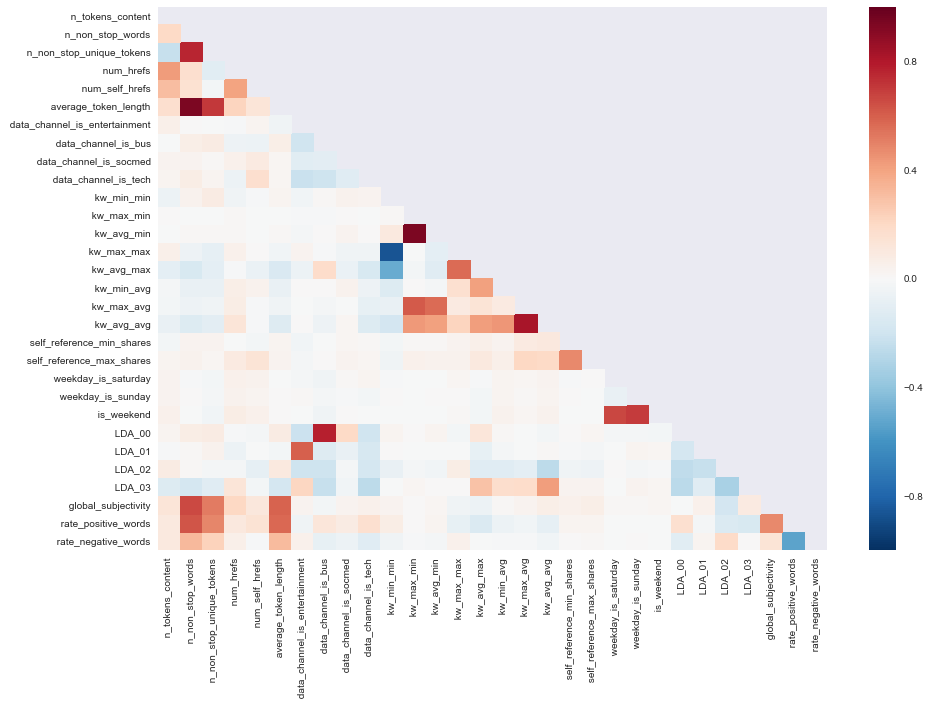

In [438]:
fig, ax = plt.subplots(figsize = (15,10))

mask = np.zeros_like(X_train_new_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(X_train_new_df.corr(), mask=mask)


## 8. Hyperparameter Optimization with GridSearch

Fit three logistic regressions on your training set, with the following parameters:

1. A logistic regression with the default hyperparameters, with all features.
2. A logistic regression with the default hyperparameters, with only the features you selected in question 7.
3. A logistic regression using `GridSearchCV` to optimize the following hyperparameters, with only the features you selected in question 7. Print out the hyperparameters selected by `GridSearchCV`
  - `penalty`: should we use l1 or l2 regularization?
  - `C`: how strong should our regularization be?
4. Score each of your fit models against the holdout set. Which model does the best?
5. Print out a confusion matrix for each model. Are there any trends that you see?

In [439]:
#1 
logreg_all = LogisticRegression()
logreg_all.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [455]:
#2 
X_train_fs = X_train.iloc[:, rfe.support_]
X_test_fs = X_test.iloc[:, rfe.support_]
print(X_train_fs.shape, X_test_fs.shape)

logreg_selected_features = LogisticRegression()
logreg_selected_features.fit(X_train_fs, y_train)

(26561, 30) (13083, 30)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [460]:
params = {
    'penalty': ['l1', 'l2'],
    'C': np.linspace(0.01, 0.99, 10)
}

gridsearch = GridSearchCV(LogisticRegression(), params, n_jobs=-1, verbose=2)
gridsearch.fit(X_train_fs, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.01, penalty=l1 ..............................................
[CV] C=0.01, penalty=l1 ..............................................
[CV] C=0.01, penalty=l1 ..............................................
[CV] C=0.01, penalty=l2 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   0.8s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ............................... C=0.01, penalty=l2, total=   0.7s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   0.9s
[CV] C=0.118888888889, penalty=l1 ....................................
[CV] ............................... C=0.01, penalty=l1, total=   1.1s
[CV] C=0.118888888889, penalty=l1 ....................................
[CV] ............................... C=0.01, penalty=l2, total=   0.9s
[CV] ...........

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.8s


[CV] C=0.663333333333, penalty=l1 ....................................
[CV] ..................... C=0.554444444444, penalty=l2, total=   0.7s
[CV] C=0.663333333333, penalty=l1 ....................................
[CV] ..................... C=0.554444444444, penalty=l2, total=   0.8s
[CV] C=0.663333333333, penalty=l2 ....................................
[CV] ..................... C=0.663333333333, penalty=l2, total=   0.7s
[CV] C=0.663333333333, penalty=l2 ....................................
[CV] ..................... C=0.663333333333, penalty=l2, total=   0.7s
[CV] C=0.663333333333, penalty=l2 ....................................
[CV] ..................... C=0.663333333333, penalty=l1, total=   1.8s
[CV] C=0.772222222222, penalty=l1 ....................................
[CV] ..................... C=0.663333333333, penalty=l1, total=   2.0s
[CV] C=0.772222222222, penalty=l1 ....................................
[CV] ..................... C=0.663333333333, penalty=l2, total=   0.6s
[CV] C

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   26.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([ 0.01   ,  0.11889,  0.22778,  0.33667,  0.44556,  0.55444,
        0.66333,  0.77222,  0.88111,  0.99   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [461]:
gridsearch.best_estimator_

LogisticRegression(C=0.11888888888888888, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [464]:
gv_best_score = gridsearch.best_score_
gv_best_score

0.65453107940213096

In [466]:
gv_best_estimator = gridsearch.best_estimator_
gv_best_estimator

LogisticRegression(C=0.11888888888888888, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [470]:
print ('GV Score: ' , gv_best_estimator.score(X_test_fs, y_test))

GV Score:  0.645570587786


In [471]:
print ('Log Reg Selected: ' , logreg_selected_features.score(X_test_fs, y_test)) 

Log Reg Selected:  0.596728579072


In [472]:
print ('Log Reg All: ' , logreg_all.score(X_test, y_test)) 

Log Reg All:  0.597187189483


####  We see that the Grid Search Approach gives the best score 

In [477]:
all_features_pred = logreg_all.predict(X_test)
select_features_pred = logreg_selected_features.predict(X_test_fs)
grid_search_pred = gridsearch.predict(X_test_fs)

In [478]:
from sklearn.metrics import confusion_matrix
cm_all = confusion_matrix(y_test, all_features_pred)
cm_all

array([[5146, 1921],
       [3349, 2667]])

In [480]:
cm_selected = confusion_matrix(y_test, select_features_pred)
cm_selected

array([[5113, 1954],
       [3322, 2694]])

In [481]:
gs = confusion_matrix(y_test, grid_search_pred)
gs

array([[5146, 1921],
       [2716, 3300]])